<a href="https://colab.research.google.com/github/ketakishirgave-visuals/internboot/blob/main/Simple%20Sales%20Forecast%20with%20Moving%20Average_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd


uploaded = files.upload()
filename = list(uploaded.keys())[0]

train = pd.read_excel(filename, parse_dates=['date'])
k
train.head()


Saving cleaned_train_with_features.xlsx to cleaned_train_with_features.xlsx


/tmp/ipython-input-258481955.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train = pd.read_excel(filename, parse_dates=['date'])


,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_x,...,locale,locale_name,description,transferred,year,month,weekday,is_weekend,month_name,day_name
0,0,41275,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,...,National,Ecuador,Primer dia del ano,0.0,2013,1,1,0,January,Tuesday
1,1,41275,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,...,National,Ecuador,Primer dia del ano,0.0,2013,1,1,0,January,Tuesday
2,2,41275,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,...,National,Ecuador,Primer dia del ano,0.0,2013,1,1,0,January,Tuesday
3,3,41275,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,...,National,Ecuador,Primer dia del ano,0.0,2013,1,1,0,January,Tuesday
4,4,41275,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,...,National,Ecuador,Primer dia del ano,0.0,2013,1,1,0,January,Tuesday


In [2]:

daily_sales = train.groupby('date')['sales'].sum().reset_index()

daily_sales.head()


,date,sales
0,41275,2511.618999
1,41276,496092.417944
2,41277,361461.231124
3,41278,354459.677093
4,41279,477350.121229


In [4]:

daily_sales['Weekly_MA'] = daily_sales['sales'].rolling(window=7, min_periods=1).mean()

daily_sales['Monthly_MA'] = daily_sales['sales'].rolling(window=30, min_periods=1).mean()


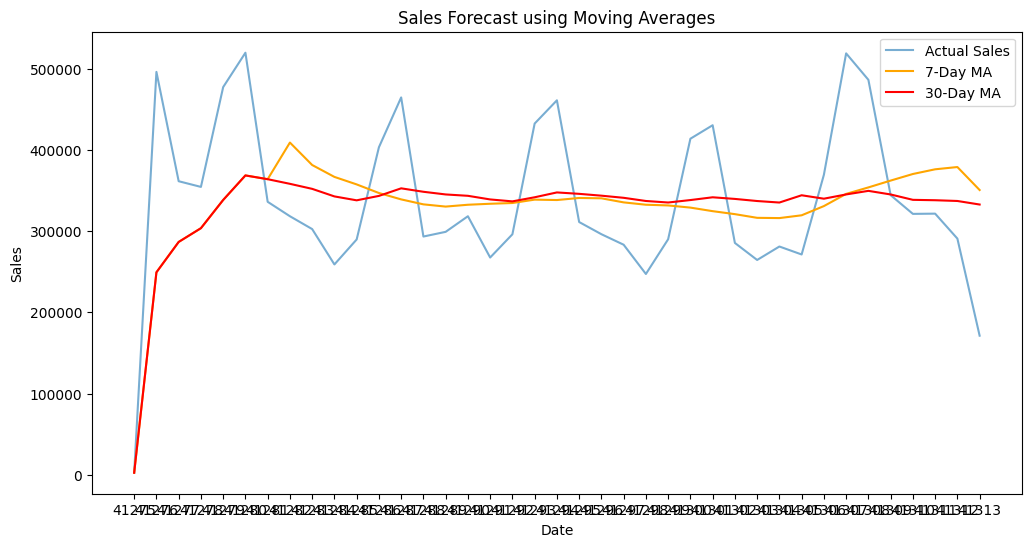

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(daily_sales['date'], daily_sales['sales'], label='Actual Sales', alpha=0.6)
plt.plot(daily_sales['date'], daily_sales['Weekly_MA'], label='7-Day MA', color='orange')
plt.plot(daily_sales['date'], daily_sales['Monthly_MA'], label='30-Day MA', color='red')
plt.title('Sales Forecast using Moving Averages')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [6]:
# Save to Excel
output_file = 'sales_forecast.xlsx'
daily_sales.to_excel(output_file, index=False)

# Download manually
from google.colab import files
files.download(output_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>